AWS란 ‘Automatic Weather System’의 약자로 방재기상관측장비

ASOS란 ‘Automated Synoptic Observing System’의 약자로 종관기상관측장비




# **0. 준비**

In [ ]:
# matplotlib 한글 깨짐방지
# 아래 코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic') # matplotlib 한글 깨짐 방지

# **1. 데이터 확인 - 분포, 결측치**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨빅콘/train_heat.csv')

In [ ]:
# 데이터 정보 확인

data.shape

(499301, 12)

* 총 499301개의 행, 12개의 칼럼

In [ ]:
# 데이터 정보 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              499301 non-null  int64  
 1   train_heat.tm           499301 non-null  int64  
 2   train_heat.branch_id    499301 non-null  object 
 3   train_heat.ta           499301 non-null  float64
 4   train_heat.wd           499301 non-null  float64
 5   train_heat.ws           499301 non-null  float64
 6   train_heat.rn_day       499301 non-null  float64
 7   train_heat.rn_hr1       499301 non-null  float64
 8   train_heat.hm           499301 non-null  float64
 9   train_heat.si           499301 non-null  float64
 10  train_heat.ta_chi       499301 non-null  float64
 11  train_heat.heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 45.7+ MB


* Null 값은 없어 보임

* branch_id만 범주형 변수, 나머지는 모두 수치형 변수

In [ ]:
data.describe()

,Unnamed: 0,train_heat.tm,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand
count,499301.000000,4.993010e+05,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000
mean,249651.000000,2.022067e+09,10.621007,194.322872,-2.344705,-1.843207,-3.649492,53.024052,-45.600886,13.869692,95.861923
std,144135.927716,8.172155e+05,20.878917,118.348853,19.161911,21.340679,19.082926,49.080340,49.938291,11.888126,115.269280
min,1.000000,2.021010e+09,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,124826.000000,2.021100e+09,4.400000,105.000000,0.500000,0.000000,0.000000,44.900000,-99.000000,4.400000,25.000000
50%,249651.000000,2.022070e+09,14.200000,212.100000,1.100000,0.000000,0.000000,64.700000,0.000000,15.000000,55.000000
75%,374476.000000,2.023040e+09,22.500000,294.300000,2.000000,0.000000,0.000000,82.500000,0.960000,24.300000,116.000000
max,499301.000000,2.023123e+09,37.800000,360.000000,11.900000,326.500000,92.500000,100.000000,3.920000,37.100000,966.000000


* 기상 관측 장비의 오류나 고장으로 관측이 진행되지 않은 경우 결측(미관측)으로 -99.0 표시

    -> tm 제외 모든 칼럼들이 결측치가 있음

    -> -99.0인 값들만 뽑아서 확인해봐야 할듯

In [ ]:
# 상위 5개의 데이터 확인

data.head()

,Unnamed: 0,train_heat.tm,train_heat.branch_id,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand
0,1,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,3,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,4,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,5,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


* 열마다 train_heat가 붙어 있음

    -> 제거 필요

* 첫번째 열도 제거

In [ ]:
# 첫번째 열 제거
data = data.drop(columns=["Unnamed: 0"])

# 컬럼명에서 train_heat. 제거
data.columns = data.columns.str.replace("train_heat.", "", regex=False)

data.head()

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
0,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


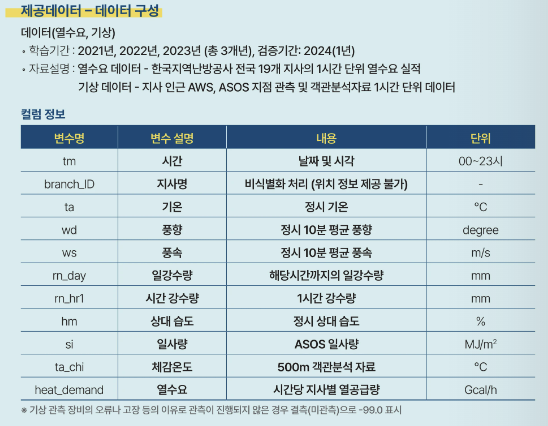

# **1-1. 변수별 확인(feature)**

### **1-1-1. 시간(tm)**

In [ ]:
# tm: 시간 - 날짜 및 시각
data['tm'].tail()

,tm
499296,2023123119
499297,2023123120
499298,2023123121
499299,2023123122
499300,2023123123


* 형태: 8자리 YYYY MM DD HH 연월일시각
* 1시간 단위임
* int형으로 되어 있어서 datetime으로 변환 필요?
* 아님 각자 연/월/일/시간으로 칼럼 만들기

In [ ]:
unique_tm_rows = data[~data['tm'].duplicated(keep=False)]
unique_tm_rows

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


In [ ]:
# 날짜 데이터를 데이트타임으로 변경
data['tm'] = pd.to_datetime(data['tm'].astype(str), format="%Y%m%d%H")
data.head()

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


In [ ]:
data['tm'].dtype

dtype('<M8[ns]')

In [ ]:
# 1시간 단위 전체 시간 생성
full_time_index = pd.date_range(start=data["tm"].min(), end=data["tm"].max(), freq="H")

# 누락된 시간 찾기
times = set(data["tm"])
missing_times = [t for t in full_time_index if t not in times]

print(f"누락된 시간 개수: {len(missing_times)}")
if missing_times:
    print("누락된 시간들:")
    print(missing_times)
else:
    print("모든 시간이 연속적으로 존재합니다.")

<ipython-input-60-2e0c9410b860>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_index = pd.date_range(start=data["tm"].min(), end=data["tm"].max(), freq="H")


누락된 시간 개수: 0
모든 시간이 연속적으로 존재합니다.


* 시간 데이터는 결측치 X

### **1-1-2. 지사명(branch ID)**

In [ ]:
# branch ID: 지사명 - 비식별화 처리
print(data['branch_id'].unique())
print(data['branch_id'].nunique())
print(data['branch_id'].value_counts())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S']
19
branch_id
A    26279
B    26279
C    26279
D    26279
E    26279
F    26279
G    26279
H    26279
I    26279
J    26279
K    26279
L    26279
M    26279
N    26279
O    26279
P    26279
Q    26279
R    26279
S    26279
Name: count, dtype: int64


* 지사는 총 19개로 이루어져 있음

* 기상 데이터는 지사 인근의 기상 데이터이므로 지사가 날씨의 중요한 기준이 될 것으로 추정

* 그럼 지사를 예측시에 피처 변수로 써야 하나?

* 지사별 데이터는 26279개로 동일함

### **1-1-3. 기온(ta)**

* 1시간마다 측정된 정각 시점의 기온

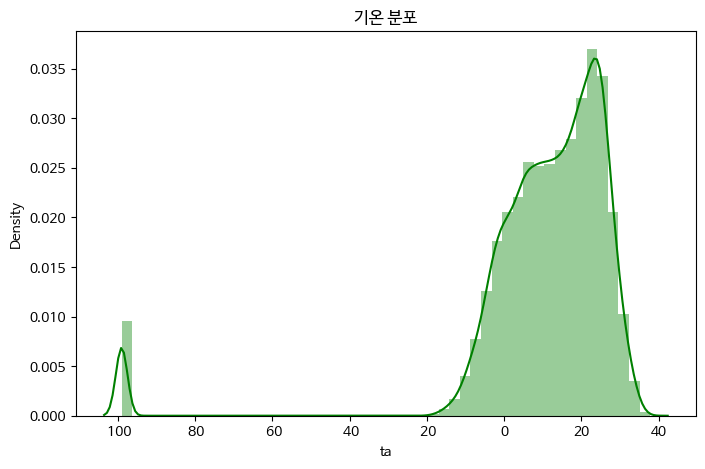

In [ ]:
# ta: 기온 - 정시 기온
plt.figure(figsize = (8,5))
plt.title("기온 분포")
ax = sns.distplot(data["ta"], color = 'g')

In [ ]:
data["ta"].describe()

,ta
count,499301.000000
mean,10.621007
std,20.878917
min,-99.000000
25%,4.400000
50%,14.200000
75%,22.500000
max,37.800000


* 평균: 10, 최소: -99, 최대: 37

* -99만 결측치로 보고 제외하면 될듯

In [ ]:
# 온도 결측치 행
data[data["ta"] == -99]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
12513,2022-06-06 10:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.68,19.6,30
14505,2022-08-28 10:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.81,23.2,27
15723,2022-10-18 04:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,6.1,95
15942,2022-10-27 07:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.00,7.7,103
29000,2021-04-24 10:00:00,B,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.20,18.9,123
...,...,...,...,...,...,...,...,...,...,...,...
498111,2023-11-12 10:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.31,2.0,16
498112,2023-11-12 11:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.80,1.7,17
498113,2023-11-12 12:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.11,1.7,15
498114,2023-11-12 13:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.17,2.7,15


* 결측치 행이 12997개나 됨.... 어떻게 처리하지?

* 없애거나 보간법

* 중간에 한 개씩 결측인 행은 보간법 실시하면 될 것 같고

* 연속적으로 결측인 행들은 보간법을 어떻게 적용할지 좀더 고민해봐야 할듯

In [ ]:
# 결측치 제외한 통계량
data[data["ta"] != -99]["ta"].describe()

,ta
count,486304.000000
mean,13.550747
std,10.855174
min,-19.700000
25%,5.200000
50%,14.700000
75%,22.700000
max,37.800000


* 평균: 13.5, 최소: -19.7, 최대: 37.8

### **1-1-4. 풍향(wd)**

* 풍향은 0°~360° 사이의 값을 가지는 **각도(degree)**

    * 즉, 평균 풍향이 음수로 나타난다면 오류값 또는 결측값 !!

* "정시 10분 평균 풍향"은 매 정각 기준으로 이전 10분간 측정된 풍향의 평균

    * 예: 15:00의 값은 14:50~15:00 사이에 측정된 풍향을 평균낸 것

    * 예보/관측 데이터에서는 보통 10분 동안 1분 단위로 측정된 풍향을 벡터 평균하여 구함

* 기온 데이터와 함께 쓸 수 있는가?

    * 기온은 상대적으로 느리게 변하는 물리량이기 때문에, 정각 시점의 기온을 그 직전 몇 분의 풍향/풍속 등과 함께 분석하는 것이 일반적이라고 함

    * 풍향은 단기간 내에 변할 수 있지만, 10분 평균 풍향은 급변하는 노이즈를 줄이기 위한 대표값이기 때문에 정시 기온과 잘 어울림.


| 풍향   | 의미 (어디서 불어오는 바람인지) |
| ---- | ------------------ |
| 0°   | 북풍 (북쪽에서 남쪽으로)     |
| 90°  | 동풍 (동쪽에서 서쪽으로)     |
| 180° | 남풍 (남쪽에서 북쪽으로)     |
| 270° | 서풍 (서쪽에서 동쪽으로)     |


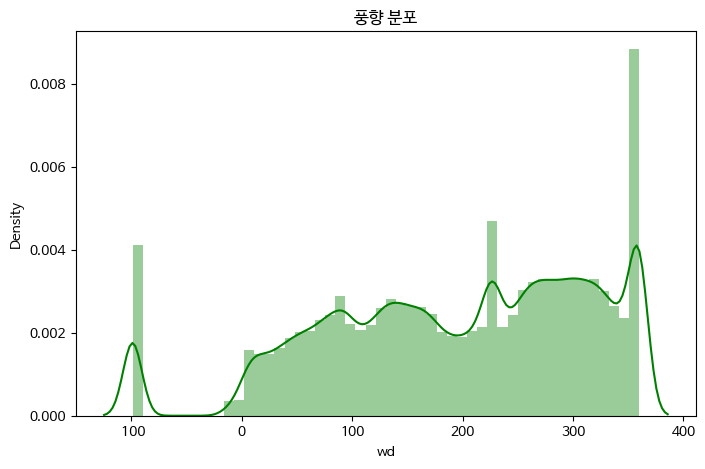

In [ ]:
# wd: 풍향 - 정시 10분 평균 풍향
plt.figure(figsize = (8,5))
plt.title("풍향 분포")
ax = sns.distplot(data["wd"], color = 'g')

* -99 제외 0 이하의 값이 있음 (???)

In [ ]:
# -99를 제외한 음수값
data[(data["wd"]<0) & (data["wd"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
20077,2023-04-17 14:00:00,A,16.5,-9.9,0.6,0.0,0.0,38.3,1.54,16.5,53
20078,2023-04-17 15:00:00,A,16.6,-9.9,0.6,0.0,0.0,38.7,1.28,17.1,49
57538,2021-07-27 13:00:00,C,34.3,-9.9,1.0,0.0,0.0,47.2,2.02,34.7,144
57539,2021-07-27 14:00:00,C,35.6,-9.9,1.5,0.0,0.0,39.6,0.92,35.4,139
57540,2021-07-27 15:00:00,C,36.2,-9.9,1.1,0.0,0.0,38.2,1.09,35.8,145
...,...,...,...,...,...,...,...,...,...,...,...
405707,2022-04-26 03:00:00,P,15.8,-9.9,1.7,2.9,1.7,98.0,-99.00,15.6,55
405708,2022-04-26 04:00:00,P,15.8,-9.9,1.4,4.7,1.8,98.4,-99.00,15.7,54
405876,2022-05-03 04:00:00,P,4.7,-9.9,0.1,0.0,0.0,81.4,-99.00,6.2,51
405877,2022-05-03 05:00:00,P,5.2,-9.9,0.4,0.0,0.0,82.1,-99.00,6.3,53


* -9.9 값들이 있는데 얘네도 결측치인가

In [ ]:

# -99, -9.9를 제외한 음수값
data[(data["wd"]<0) & (data["wd"] != -99) & (data["wd"] != -9.9)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -9.9, -99를 제외한 음수값은 없음

In [ ]:
# 결측치 제외한 통계량
data[(data["wd"] != -99) & (data["wd"] != -9.9)]["wd"].describe()

,wd
count,478897.000000
mean,206.524619
std,104.573652
min,0.000000
25%,119.500000
50%,221.600000
75%,297.400000
max,360.000000


* 일단 -9.9도 결측치라 봤을 때 통계량

* 평균: 206, 최소: 0, 최대: 360

In [ ]:
# 결측치 개수
data[(data["wd"] == -99) | (data["wd"] == -9.9)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
3625,2021-06-01 02:00:00,A,18.9,-99.0,-99.0,0.0,0.0,81.3,-99.00,21.0,34
3626,2021-06-01 03:00:00,A,18.9,-99.0,-99.0,0.0,0.0,81.7,-99.00,21.5,30
6173,2021-09-15 06:00:00,A,17.9,-99.0,-99.0,0.0,0.0,77.8,-99.00,21.4,19
11138,2022-04-10 03:00:00,A,14.8,-99.0,-99.0,0.0,0.0,44.2,-99.00,14.8,61
12359,2022-05-31 00:00:00,A,15.3,-99.0,-99.0,0.0,0.0,60.9,-99.00,17.6,38
...,...,...,...,...,...,...,...,...,...,...,...
498998,2023-12-19 09:00:00,S,-4.6,-99.0,-99.0,0.0,0.0,59.1,0.19,-4.6,35
498999,2023-12-19 10:00:00,S,-2.5,-99.0,-99.0,0.0,0.0,59.3,0.49,-3.1,29
499005,2023-12-19 16:00:00,S,0.9,-99.0,-99.0,0.0,0.0,54.5,0.34,0.5,33
499007,2023-12-19 18:00:00,S,-0.6,-99.0,-99.0,0.0,0.0,72.2,0.01,-0.4,35


* 풍향 결측치 행: 20404개

### **1-1-5. 풍속(ws)**

* 풍속도 음수가 나오면 안 됨

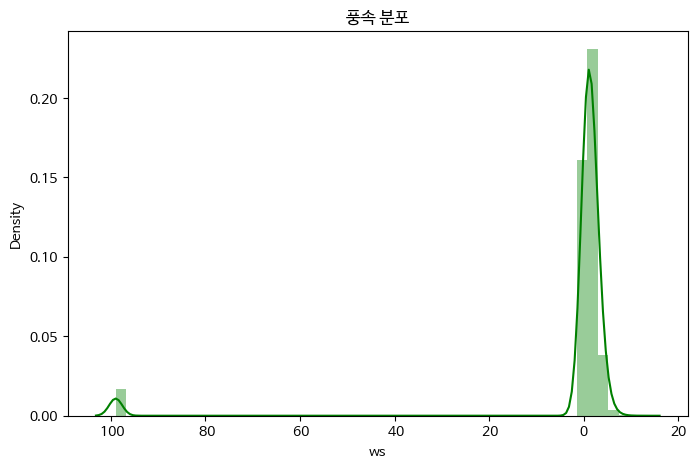

In [ ]:
# ws: 풍속 - 정시 10분 평균 풍속
plt.figure(figsize = (8,5))
plt.title("풍속 분포")
ax = sns.distplot(data["ws"], color = 'g')

* 풍속도 결측치 존재

In [ ]:
# -99를 제외한 음수값
data[(data["ws"]<0) & (data["ws"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수값은 없음

In [ ]:
# 결측치 제외한 통계량
data[(data["ws"] != -99)]["ws"].describe()

,ws
count,480486.000000
mean,1.440149
std,1.185264
min,0.000000
25%,0.500000
50%,1.200000
75%,2.100000
max,11.900000


* 평균: 1.4, 최소:0, 최대: 11.9

In [ ]:
# 결측치 개수
data[(data["ws"] == -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
3625,2021-06-01 02:00:00,A,18.9,-99.0,-99.0,0.0,0.0,81.3,-99.00,21.0,34
3626,2021-06-01 03:00:00,A,18.9,-99.0,-99.0,0.0,0.0,81.7,-99.00,21.5,30
6173,2021-09-15 06:00:00,A,17.9,-99.0,-99.0,0.0,0.0,77.8,-99.00,21.4,19
11138,2022-04-10 03:00:00,A,14.8,-99.0,-99.0,0.0,0.0,44.2,-99.00,14.8,61
12359,2022-05-31 00:00:00,A,15.3,-99.0,-99.0,0.0,0.0,60.9,-99.00,17.6,38
...,...,...,...,...,...,...,...,...,...,...,...
498998,2023-12-19 09:00:00,S,-4.6,-99.0,-99.0,0.0,0.0,59.1,0.19,-4.6,35
498999,2023-12-19 10:00:00,S,-2.5,-99.0,-99.0,0.0,0.0,59.3,0.49,-3.1,29
499005,2023-12-19 16:00:00,S,0.9,-99.0,-99.0,0.0,0.0,54.5,0.34,0.5,33
499007,2023-12-19 18:00:00,S,-0.6,-99.0,-99.0,0.0,0.0,72.2,0.01,-0.4,35


* 결측치 개수: 18815개

### **1-1-6. 일강수량(rn_day)**

* 자정(00시)부터 해당 시각까지 누적된 강수량(mm)

* 만약 시계열로 분석할 때 시간별 강수량이 필요하다면, 아래처럼 시차분(차이)을 구해야 함 :

    `data["hourly_rain"] = data["일강수량"].diff().fillna(0)`

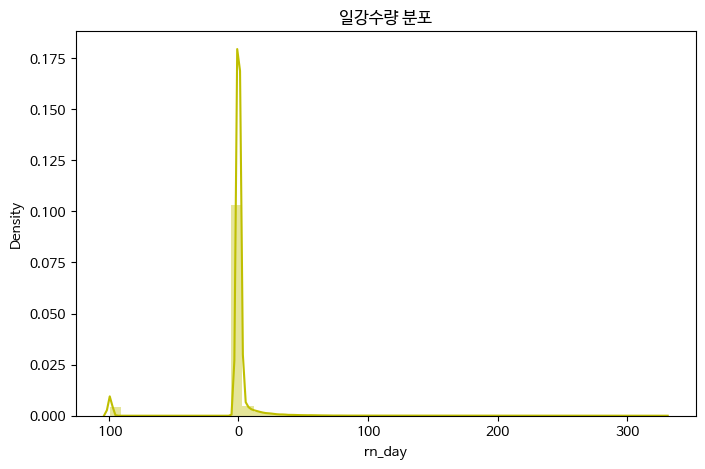

In [ ]:
# rn_day: 일강수량 - 해당 시간까지의 일강수량
plt.figure(figsize = (8,5))
plt.title("일강수량 분포")
ax = sns.distplot(data["rn_day"], color = 'y')

In [ ]:
# -99를 제외한 음수값
data[(data["rn_day"]<0) & (data["rn_day"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수값은 없음

In [ ]:
# 결측치 개수
data[(data["rn_day"] == -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
2095,2021-03-29 08:00:00,A,8.3,148.4,0.9,-99.0,-99.0,89.6,0.34,8.9,145
2096,2021-03-29 09:00:00,A,9.7,144.6,1.3,-99.0,-99.0,77.8,0.98,10.0,126
2097,2021-03-29 10:00:00,A,11.1,107.2,2.7,-99.0,-99.0,53.7,1.83,11.5,103
2098,2021-03-29 11:00:00,A,13.1,133.0,2.7,-99.0,-99.0,39.7,2.58,12.8,97
2099,2021-03-29 12:00:00,A,14.3,121.7,2.8,-99.0,-99.0,33.3,2.95,13.9,84
...,...,...,...,...,...,...,...,...,...,...,...
498112,2023-11-12 11:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.80,1.7,17
498113,2023-11-12 12:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.11,1.7,15
498114,2023-11-12 13:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.17,2.7,15
498115,2023-11-12 14:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.03,3.1,15


* 일강수량 결측치 개수: 18626

### **1-1-7. 시간 강수량(rn_hr1)**

* 일강수량을 시간별로 차분한 값이랑 같을 것

* 두 데이터 중에 하나만 사용해야 할 듯

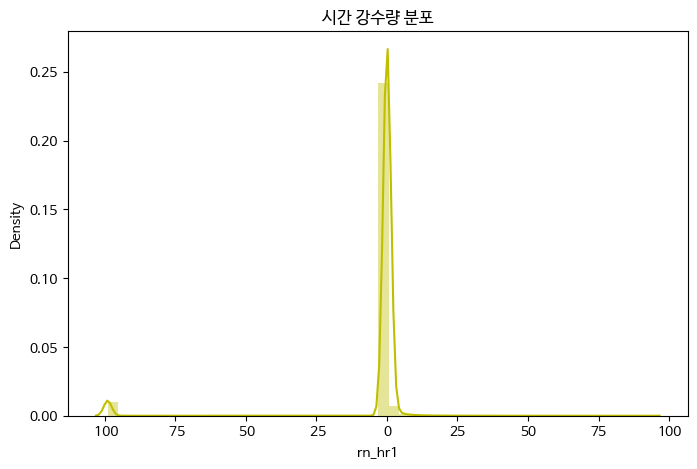

In [ ]:
# rn_hr1: 시간 강수량 - 1시간 강수량
plt.figure(figsize = (8,5))
plt.title("시간 강수량 분포")
ax = sns.distplot(data["rn_hr1"], color = 'y')

In [ ]:
# -99를 제외한 음수값
data[(data["rn_hr1"]<0) & (data["rn_hr1"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수값은 없음

In [ ]:
# 결측치 개수
data[(data["rn_hr1"] == -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
2095,2021-03-29 08:00:00,A,8.3,148.4,0.9,-99.0,-99.0,89.6,0.34,8.9,145
2096,2021-03-29 09:00:00,A,9.7,144.6,1.3,-99.0,-99.0,77.8,0.98,10.0,126
2097,2021-03-29 10:00:00,A,11.1,107.2,2.7,-99.0,-99.0,53.7,1.83,11.5,103
2098,2021-03-29 11:00:00,A,13.1,133.0,2.7,-99.0,-99.0,39.7,2.58,12.8,97
2099,2021-03-29 12:00:00,A,14.3,121.7,2.8,-99.0,-99.0,33.3,2.95,13.9,84
...,...,...,...,...,...,...,...,...,...,...,...
498114,2023-11-12 13:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.17,2.7,15
498115,2023-11-12 14:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.03,3.1,15
498116,2023-11-12 15:00:00,S,5.5,268.8,4.1,0.0,-99.0,51.5,1.63,2.6,13
498191,2023-11-15 18:00:00,S,9.8,-99.0,-99.0,-99.0,-99.0,63.2,0.01,8.2,21


* 결측치 개수: 19154개

1. rn_day.diff() (시간 차분)이 rn_hr1과 같은지 비교

2. 하루치 rn_hr1 누적합이 그날 00시의 rn_day 값과 같은지 비교



In [ ]:
data[(data["rn_day"] > 0)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
141,2021-01-06 22:00:00,A,-5.2,297.4,2.4,0.5,0.5,70.7,-99.00,-8.1,363
142,2021-01-06 23:00:00,A,-6.1,134.9,2.9,0.5,0.0,71.7,-99.00,-5.4,344
143,2021-01-07 00:00:00,A,-9.3,309.7,5.6,1.0,0.5,68.0,-99.00,-15.6,331
281,2021-01-12 18:00:00,A,-1.5,149.8,0.6,1.0,1.0,94.6,0.01,-0.8,338
282,2021-01-12 19:00:00,A,-1.8,140.1,0.8,1.0,0.0,94.9,-99.00,-1.0,341
...,...,...,...,...,...,...,...,...,...,...,...
499296,2023-12-31 19:00:00,S,3.2,233.5,0.4,2.5,0.0,91.5,-99.00,2.8,34
499297,2023-12-31 20:00:00,S,2.9,227.4,0.1,2.5,0.0,92.1,-99.00,2.7,35
499298,2023-12-31 21:00:00,S,2.1,360.0,0.0,2.5,0.0,93.3,-99.00,1.4,35
499299,2023-12-31 22:00:00,S,2.2,30.0,1.4,2.5,0.0,95.5,-99.00,1.3,40


In [ ]:
data2 = data.copy()

# 1. rn_day 차분한 값이 rn_hr1과 같은지 비교
data2["rn_day_diff"] = data2["rn_day"].diff().fillna(0)
data2["rn_hr1_diff_match"] = (data2["rn_hr1"].round(2) == data2["rn_day_diff"].round(2))

# 2. 하루 단위로 rn_hr1 합이 해당 날 00시 rn_day와 같은지 확인
# 날짜만 따기
data2["date"] = data2["tm"].dt.date
# 00시만 추출
rn_day_00h = data2[data2["tm"].dt.hour == 0][["date", "rn_day"]].rename(columns={"rn_day": "rn_day_00h"})
# rn_hr1 하루 합
daily_rn_hr1_sum = data2.groupby("date")["rn_hr1"].sum().reset_index().rename(columns={"rn_hr1": "rn_hr1_sum"})
# 병합
compare_daily = pd.merge(rn_day_00h, daily_rn_hr1_sum, on="date", how="inner")
compare_daily["match"] = (compare_daily["rn_day_00h"].round(2) == compare_daily["rn_hr1_sum"].round(2))

# 결과 출력
print("=== rn_day.diff() vs rn_hr1 비교 (상위 10개) ===")
print(data2[["tm", "rn_day", "rn_day_diff", "rn_hr1", "rn_hr1_diff_match"]].head(10))

print("\n=== 하루 rn_hr1 합 vs 00시 rn_day 비교 (상위 10일) ===")
print(compare_daily.head(10))


=== rn_day.diff() vs rn_hr1 비교 (상위 10개) ===
                   tm  rn_day  rn_day_diff  rn_hr1  rn_hr1_diff_match
0 2021-01-01 01:00:00     0.0          0.0     0.0               True
1 2021-01-01 02:00:00     0.0          0.0     0.0               True
2 2021-01-01 03:00:00     0.0          0.0     0.0               True
3 2021-01-01 04:00:00     0.0          0.0     0.0               True
4 2021-01-01 05:00:00     0.0          0.0     0.0               True
5 2021-01-01 06:00:00     0.0          0.0     0.0               True
6 2021-01-01 07:00:00     0.0          0.0     0.0               True
7 2021-01-01 08:00:00     0.0          0.0     0.0               True
8 2021-01-01 09:00:00     0.0          0.0     0.0               True
9 2021-01-01 10:00:00     0.0          0.0     0.0               True

=== 하루 rn_hr1 합 vs 00시 rn_day 비교 (상위 10일) ===
         date  rn_day_00h  rn_hr1_sum  match
0  2021-01-02         0.0      -890.0  False
1  2021-01-03         0.0       -99.0  False
2  2

* -99라는 결측치때문에 두 값이 달라지는 오류가 생김

* 두 변수 중에 하나만 선택해야 하는데 가장 결측치가 없는 것으로 선택하는게 나을까?

    -> 그러면 일강수량이 결측치가 더 적음

In [ ]:
# 다중공산성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 다중공선성 확인할 변수들
cols = ['rn_day', 'rn_hr1']
data2['rn_day'] = pd.to_numeric(data2['rn_day'], errors='raise')
data2['rn_hr1'] = pd.to_numeric(data2['rn_hr1'], errors='raise')
X = data2[cols].dropna()  # 결측값 제거
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  feature       VIF
0   const  1.071809
1  rn_day  4.942430
2  rn_hr1  4.942430


* VIF < 5: 다중공선성 문제 없음

* 별로 안 높음!!!!!!!!! 그냥 둘 다 쓰자

### **1-1-8. 상대 습도(hm)**

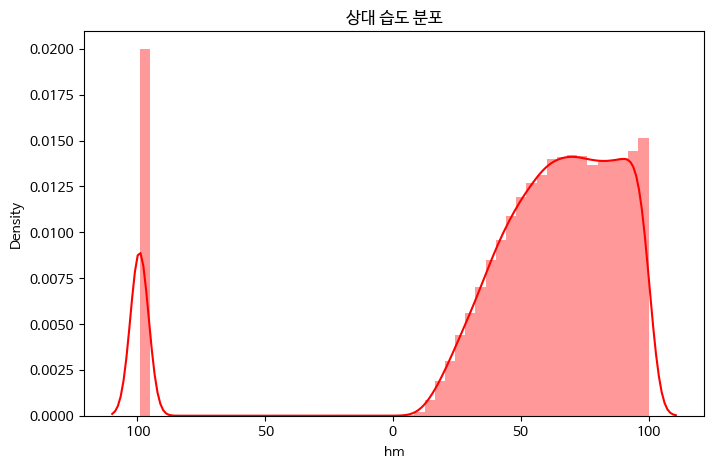

In [ ]:
# hm: 상대 습도 - 정시 상대 습도
plt.figure(figsize = (8,5))
plt.title("상대 습도 분포")
ax = sns.distplot(data["hm"], color = 'r')

In [ ]:
# -99를 제외한 음수값
data[(data["hm"]<0) & (data["hm"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수값은 없음

In [ ]:
# 결측치 제외한 통계량
data[(data["hm"] != -99)]["hm"].describe()

,hm
count,459584.000000
mean,66.161889
std,21.146626
min,2.500000
25%,50.300000
50%,67.600000
75%,84.000000
max,100.000000


* 평균 66, 최소 2.5, 최대 100

In [ ]:
# 결측치 개수
data[(data["hm"] == -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
12513,2022-06-06 10:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.68,19.6,30
14505,2022-08-28 10:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.81,23.2,27
15723,2022-10-18 04:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,6.1,95
15942,2022-10-27 07:00:00,A,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.00,7.7,103
26279,2021-01-01 01:00:00,B,-8.7,91.5,0.4,0.0,0.0,-99.0,-99.00,-10.5,739
...,...,...,...,...,...,...,...,...,...,...,...
498111,2023-11-12 10:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.31,2.0,16
498112,2023-11-12 11:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.80,1.7,17
498113,2023-11-12 12:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.11,1.7,15
498114,2023-11-12 13:00:00,S,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,2.17,2.7,15


* 결측치 개수: 39717개

### **1-1-9. 일사량(si)**

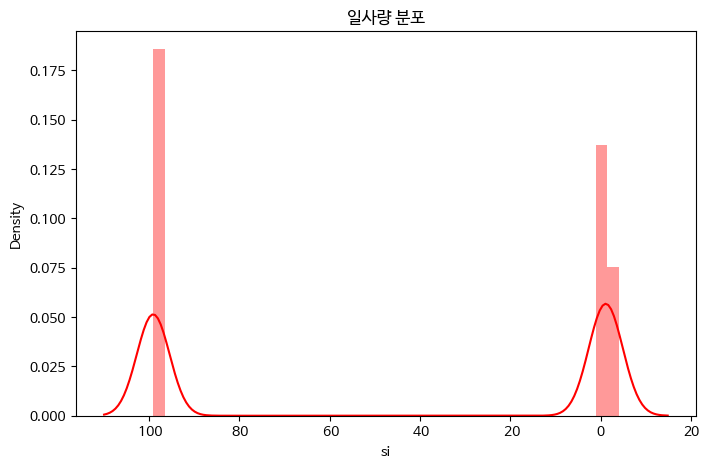

In [ ]:
# si: 일사량 - ASOS 일사량
plt.figure(figsize = (8,5))
plt.title("일사량 분포")
ax = sns.distplot(data["si"], color = 'r')

In [ ]:
# -99를 제외한 음수값
data[(data["si"]<0) & (data["si"] != -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수값 없음

In [ ]:
# 결측치 제외한 통계량
data[(data["si"] != -99)]["si"].describe()

,si
count,266379.000000
mean,1.091339
std,0.972380
min,0.000000
25%,0.210000
50%,0.850000
75%,1.820000
max,3.920000


* 평균 1.09, 최소: 0, 최대: 3.92

In [ ]:
# 결측치 개수
data[(data["si"] == -99)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283
...,...,...,...,...,...,...,...,...,...,...,...
499296,2023-12-31 19:00:00,S,3.2,233.5,0.4,2.5,0.0,91.5,-99.0,2.8,34
499297,2023-12-31 20:00:00,S,2.9,227.4,0.1,2.5,0.0,92.1,-99.0,2.7,35
499298,2023-12-31 21:00:00,S,2.1,360.0,0.0,2.5,0.0,93.3,-99.0,1.4,35
499299,2023-12-31 22:00:00,S,2.2,30.0,1.4,2.5,0.0,95.5,-99.0,1.3,40


* 결측치 개수: 232922개
    
    * 좀 많음

### **1-1-10. 체감온도(ta_chi)**

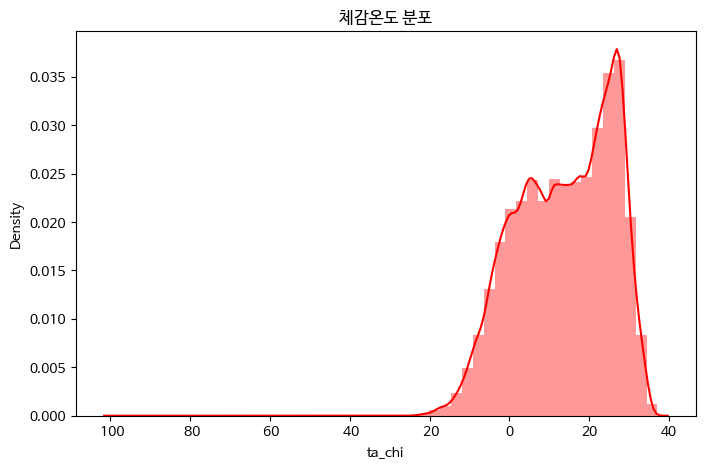

In [ ]:
# ta_chi: 체감온도 - 500m 객관분석 자료
plt.figure(figsize = (8,5))
plt.title("체감온도 분포")
ax = sns.distplot(data["ta_chi"], color = 'r')

In [ ]:
# -99를 제외한 음수값
data[(data["ta_chi"]<0) & (data["ta_chi"] != -99.00)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.00,-8.2,281
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.00,-8.6,262
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.00,-8.8,266
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.00,-8.9,285
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.00,-9.2,283
...,...,...,...,...,...,...,...,...,...,...,...
499261,2023-12-30 08:00:00,S,-0.9,284.2,0.5,0.0,0.0,97.2,0.00,-0.4,33
499267,2023-12-30 14:00:00,S,1.3,55.7,2.1,2.0,2.0,96.1,0.14,-0.9,28
499268,2023-12-30 15:00:00,S,1.4,28.3,2.0,3.0,1.0,97.7,0.16,-0.4,35
499269,2023-12-30 16:00:00,S,2.0,55.9,2.1,3.0,0.0,97.7,0.09,-0.1,24


In [ ]:
# -99를 제외한 음수값
data[(data["ta_chi"]<-30) & (data["ta_chi"] != -99.00)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* 있긴 한데, 온도니까 -99만 결측치로 보겠음

In [ ]:
# 결측치 제외한 통계량
data[(data["ta_chi"] != -99)]["ta_chi"].describe()

,ta_chi
count,499281.000000
mean,13.874214
std,11.866881
min,-24.700000
25%,4.400000
50%,15.000000
75%,24.300000
max,37.100000


* 평균: 13.8, 최소: -24.7, 최대: 37.1

In [ ]:
# 결측치 개수
len(data[(data["ta_chi"] == -99)])

20

* 결측치 개수: 20

# **1-2. 변수별 확인(target)**

* 열 공급량: 음수가 될 수 없음

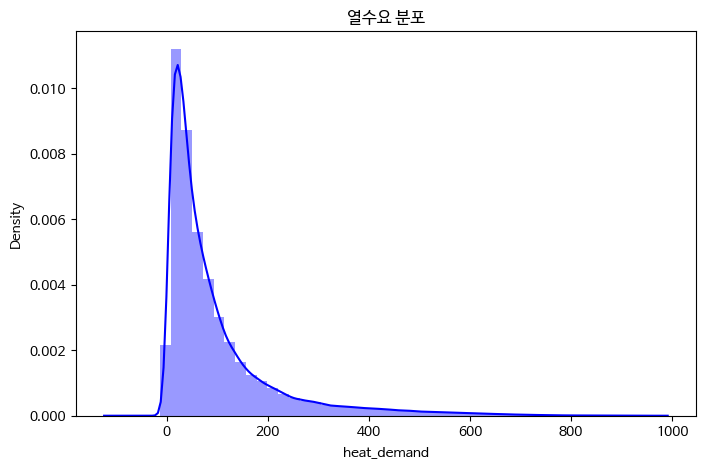

In [ ]:
# heat_demand: 열수요 - 시간당 지사별 열공급량
plt.figure(figsize = (8,5))
plt.title("열수요 분포")
ax = sns.distplot(data["heat_demand"], color = 'b')

In [ ]:
# 왜도 확인
data["heat_demand"].skew()

np.float64(2.5386209047331274)

* 왜도 = 2.53 → 매우 오른쪽으로 치우친 분포

    * 이상치 존재 가능성 있음

    * 로그 변환이나 제곱근 변환, Box-Cox 변환 등 필요

In [ ]:
# 통계량
data["heat_demand"].describe()

,heat_demand
count,499301.000000
mean,95.861923
std,115.269280
min,-99.000000
25%,25.000000
50%,55.000000
75%,116.000000
max,966.000000


* 얘도 -99가 있는데, 결측치 확인 필요

In [ ]:
# -99인 값

print(len(data[data["heat_demand"]==-99]))
data[data["heat_demand"]==-99]

23


,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
12079,2022-05-19 08:00:00,A,18.5,148.3,1.5,0.0,0.0,52.9,0.97,19.4,-99
20944,2023-05-23 17:00:00,A,25.2,277.5,1.7,0.0,0.0,30.2,2.14,24.7,-99
100528,2023-06-23 20:00:00,D,27.8,264.6,0.7,0.0,0.0,66.6,0.11,27.8,-99
100529,2023-06-23 21:00:00,D,26.5,360.0,0.0,0.0,0.0,71.4,-99.00,26.7,-99
107012,2021-03-21 01:00:00,E,7.3,275.6,0.9,0.0,0.0,-99.0,-99.00,6.9,-99
108334,2021-05-15 03:00:00,E,21.2,160.3,1.0,0.0,0.0,-99.0,-99.00,22.3,-99
108335,2021-05-15 04:00:00,E,20.8,360.0,0.0,0.0,0.0,-99.0,-99.00,22.1,-99
108336,2021-05-15 05:00:00,E,20.3,154.5,0.9,0.0,0.0,-99.0,-99.00,21.8,-99
110396,2021-08-09 01:00:00,E,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,25.5,-99
116861,2022-05-05 10:00:00,E,22.6,142.0,2.1,0.0,0.0,22.2,2.50,20.1,-99


* -99인 행이 23개 존재

In [ ]:
# -99를 제외한 음수값
data[(data["heat_demand"]<0) & (data["heat_demand"] != -99.00)]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand


* -99를 제외한 음수 값은 존재하지 않음

* -99인 행만 결측치로 보고 처리 필요

# **1-3. 결측치 정리 및 처리**

* 기온(ta): 12,997개

* 풍향(wd): 20,404개

* 풍속(ws): 18,815개

* 일강수량(rn_day): 18,626개

* 시간 강수량(rn_hr1): 19,154개

* 상대 습도(hm): 39,717개

* 일사량(si): 232,922개

* 체감온도(ta_chi): 20개

* 열수요(heat_demand): 23개


<질문>


1. 풍향 값 -9.9도 결측치인가

    -> 그렇게 하겠음

2. 결측치 보간법 실시할 것인지 없앨 것인지
    
    -> 결측 행의 빈도나 연속성에 따라 다를듯

2. 일사량 결측치가 좀 많음, 어떻게 처리할지

3. 타겟 변수 결측치 처리

    -> 삭제하거나 보간법

In [ ]:
# -99는 결측치로 간주
# 이때 풍향(wd)는 -9.9도 결측치로 간주
data['ta'] = data['ta'].replace(-99, pd.NA)
data['wd'] = data['wd'].replace([-99, -9.9], pd.NA)
data['ws'] = data['ws'].replace(-99, pd.NA)
data['rn_day'] = data['rn_day'].replace(-99, pd.NA)
data['rn_hr1'] = data['rn_hr1'].replace(-99, pd.NA)
data['hm'] = data['hm'].replace(-99, pd.NA)
data['si'] = data['si'].replace(-99, pd.NA)
data['ta_chi'] = data['ta_chi'].replace(-99, pd.NA)

In [114]:
cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi']

for col in cols:
    data[col] = pd.to_numeric(data[col], errors='raise')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tm           499301 non-null  datetime64[ns]
 1   branch_id    499301 non-null  object        
 2   ta           486304 non-null  float64       
 3   wd           478897 non-null  float64       
 4   ws           480486 non-null  float64       
 5   rn_day       480675 non-null  float64       
 6   rn_hr1       480147 non-null  float64       
 7   hm           459584 non-null  float64       
 8   si           266379 non-null  float64       
 9   ta_chi       499281 non-null  float64       
 10  heat_demand  499301 non-null  int64         
 11  ta_filled    486304 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 45.7+ MB


In [116]:
# 공통적인 결측
cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm']
all_na_rows = data[data[cols].isna().all(axis=1)]
all_na_rows = all_na_rows.sort_values('tm').reset_index(drop=True)
all_na_rows

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand,ta_filled
0,2021-01-04 13:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,1.83,4.0,141,<NA>
1,2021-01-09 03:00:00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.9,186,<NA>
2,2021-01-09 04:00:00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.3,179,<NA>
3,2021-01-09 05:00:00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.8,178,<NA>
4,2021-01-09 06:00:00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.0,180,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
12921,2023-12-29 03:00:00,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,425,<NA>
12922,2023-12-29 04:00:00,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,279,<NA>
12923,2023-12-29 04:00:00,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,406,<NA>
12924,2023-12-29 05:00:00,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,392,<NA>


* si(일사량), 체감온도(ta_chi)를 제외한 나머지 열들에서 공통적으로 결측치가 나타나는 행은 12926개

In [117]:
# 연속 결측 구간 그룹핑

# 시간 차이가 1시간보다 크면 끊긴 것으로 간주
all_na_rows['time_diff'] = all_na_rows['tm'].diff()
all_na_rows['gap_group'] = (all_na_rows['time_diff'] != pd.Timedelta(hours=1)).cumsum()

# 각 결측 구간의 시작/끝/길이 요약
na_gaps_summary = all_na_rows.groupby('gap_group').agg(
    start_time=('tm', 'min'),
    end_time=('tm', 'max'),
    duration=('tm', 'count')
).reset_index(drop=True)

# 길이 기준 내림차순 정렬
na_gaps_summary = na_gaps_summary.sort_values(by='duration', ascending=False)

print(na_gaps_summary)

              start_time            end_time  duration
5204 2023-07-06 13:00:00 2023-07-24 10:00:00       430
4310 2021-12-06 17:00:00 2021-12-16 12:00:00       236
5596 2023-09-18 05:00:00 2023-09-26 18:00:00       206
5575 2023-08-31 19:00:00 2023-09-06 01:00:00       127
5497 2023-08-19 05:00:00 2023-08-24 06:00:00       122
...                  ...                 ...       ...
18   2021-03-09 10:00:00 2021-03-09 10:00:00         1
17   2021-03-02 15:00:00 2021-03-02 15:00:00         1
14   2021-02-21 02:00:00 2021-02-21 02:00:00         1
11   2021-02-21 00:00:00 2021-02-21 00:00:00         1
9    2021-02-16 11:00:00 2021-02-16 11:00:00         1

[5674 rows x 3 columns]


In [118]:
# duration별 개수 집계 후 내림차순 정렬
duration_counts = na_gaps_summary["duration"].value_counts().sort_index(ascending=False).reset_index()
duration_counts.columns = ["duration", "count"]

print(duration_counts)

    duration  count
0        430      1
1        236      1
2        206      1
3        127      1
4        122      1
5        121      1
6        117      1
7        110      1
8         96      1
9         90      1
10        85      1
11        84      1
12        82      1
13        77      1
14        66      1
15        63      1
16        56      1
17        51      1
18        50      1
19        47      1
20        42      1
21        40      1
22        38      1
23        37      1
24        32      1
25        31      1
26        30      1
27        28      1
28        27      1
29        24      1
30        23      1
31        21      2
32        20      2
33        19      1
34        18      2
35        17      1
36        15      2
37        14      3
38        13      1
39        12      4
40        11      2
41        10      3
42         9      2
43         8      2
44         7      4
45         6      3
46         5      8
47         4     11
48         3     16


<갑자기 든 생각>

1. 지점별로 날짜를 모두 갖고 있고 각 기상이 다른데, 지점별로 통합해서 보간을 진행해도 되나? 아님 지점별로 나눠서 보간 진행?

    -> 지사별로 다르게 보간 진행해야 함, 사실 모델링도 따로 하는게 좋음

2. 데이터가 3년 간의 데이터고, 한 시간 단위인데 3년 간의 데이터로도 결측치가 잘 보완될까?

    -> 지피티가 충분하대


자 결론

짧은 구간 결측은 딥러닝보다 선형보간이 오히려 더 낫다고 함

| 결측 길이     | 추천 보간 방법                                                     |
| --------- | ------------------------------------------------------------ |
| 1\~3시간    | `선형보간 (linear interpolation)`                                |
| 4\~24시간   | `스플라인 보간`, `KNN imputer`, `시계열 평균`                           |
| 1일\~수일 이상 | `LSTM Autoencoder`, `BRITS`, `Transformer 기반 모델` 등 딥러닝 활용 고려 |


## **1-3-1. 온도 결측치**

In [119]:
# 온도 결측치 행
data[data['ta'].isna()]

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand,ta_filled
12513,2022-06-06 10:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,0.68,19.6,30,<NA>
14505,2022-08-28 10:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,1.81,23.2,27,<NA>
15723,2022-10-18 04:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,95,<NA>
15942,2022-10-27 07:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,0.00,7.7,103,<NA>
29000,2021-04-24 10:00:00,B,NaN,NaN,NaN,NaN,NaN,NaN,1.20,18.9,123,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
498111,2023-11-12 10:00:00,S,NaN,NaN,NaN,NaN,NaN,NaN,1.31,2.0,16,<NA>
498112,2023-11-12 11:00:00,S,NaN,NaN,NaN,NaN,NaN,NaN,1.80,1.7,17,<NA>
498113,2023-11-12 12:00:00,S,NaN,NaN,NaN,NaN,NaN,NaN,2.11,1.7,15,<NA>
498114,2023-11-12 13:00:00,S,NaN,NaN,NaN,NaN,NaN,NaN,2.17,2.7,15,<NA>


In [120]:
# ta가 결측인지 여부 확인
is_nan = data["ta"].isna()

# 결측 구간 그룹핑을 위해 이전 값과 다를 때마다 그룹 번호 증가
group = (is_nan != is_nan.shift()).cumsum()

# 결측인 구간만 추출
nan_groups = data[is_nan].groupby(group)

# 구간 정보 추출
missing_info_ta = nan_groups.agg(
    start_time = ("tm", "first"),
    end_time = ("tm", "last"),
    length = ("tm", "count")
).reset_index(drop=True)

print(missing_info_ta)

             start_time            end_time  length
0   2022-06-06 10:00:00 2022-06-06 10:00:00       1
1   2022-08-28 10:00:00 2022-08-28 10:00:00       1
2   2022-10-18 04:00:00 2022-10-18 04:00:00       1
3   2022-10-27 07:00:00 2022-10-27 07:00:00       1
4   2021-04-24 10:00:00 2021-04-24 10:00:00       1
..                  ...                 ...     ...
408 2023-10-26 12:00:00 2023-10-26 12:00:00       1
409 2023-10-28 18:00:00 2023-10-28 18:00:00       1
410 2023-11-03 13:00:00 2023-11-03 13:00:00       1
411 2023-11-06 23:00:00 2023-11-06 23:00:00       1
412 2023-11-11 11:00:00 2023-11-12 14:00:00      28

[413 rows x 3 columns]


* 각 행은 연속된 결측 구간

    -> 413개의 결측 구간 존재

* length는 몇 시간 동안 연속으로 NaN이었는지 (1시간 단위 기준)

In [ ]:
# length 기준으로 내림차순 정렬
missing_info_ta_sorted = missing_info_ta.sort_values("length", ascending=False).reset_index(drop=True)

print(missing_info_ta_sorted)

             start_time            end_time  length
0   2021-07-21 18:00:00 2021-12-06 17:00:00    3312
1   2021-07-21 18:00:00 2021-12-06 17:00:00    3312
2   2023-06-19 08:00:00 2023-09-26 18:00:00    2387
3   2021-12-03 14:00:00 2021-12-16 12:00:00     311
4   2023-06-17 09:00:00 2023-06-27 15:00:00     247
..                  ...                 ...     ...
408 2023-10-26 12:00:00 2023-10-26 12:00:00       1
409 2022-06-06 10:00:00 2022-06-06 10:00:00       1
410 2022-10-18 04:00:00 2022-10-18 04:00:00       1
411 2022-10-27 07:00:00 2022-10-27 07:00:00       1
412 2022-08-28 10:00:00 2022-08-28 10:00:00       1

[413 rows x 3 columns]


* 3000시간 이상 연속으로 결측인 구간이 있음

    -> 거의 3,4개월인디......

* 일단 결측 구간이 짧은 애들은 선형 보간으로 보정



In [ ]:
# length별 개수 집계 후 내림차순 정렬
length_counts = missing_info_ta["length"].value_counts().sort_index(ascending=False).reset_index()
length_counts.columns = ["length", "count"]

print(length_counts)

    length  count
0     3312      2
1     2387      1
2      311      1
3      247      1
4      190      1
5      152      1
6      128      1
7      120      1
8      116      1
9      109      1
10      99      1
11      77      1
12      71      2
13      61      1
14      57      3
15      52      2
16      50      1
17      47      2
18      40      1
19      38      1
20      35      1
21      32      2
22      31      2
23      28      1
24      27      1
25      26      2
26      24      3
27      23      2
28      21      1
29      20      1
30      19      3
31      18      1
32      17     11
33      15      1
34      14      1
35      13      3
36      12      3
37      10      1
38       9     22
39       8      1
40       7     11
41       6      3
42       5     36
43       4     22
44       3     25
45       2     63
46       1    164


In [121]:
# 지사별 온도 결측치
data[data['ta'].isna()].groupby('branch_id').size().sort_values(ascending=False)

,0
branch_id,
D,3739
E,3739
F,2657
S,786
K,755
J,517
B,212
M,149
G,121



| 결측 길이     | 추천 보간 방법                                                     |
| --------- | ------------------------------------------------------------ |
| 1\~3시간    | `선형보간 (linear interpolation)`                                |
| 4\~24시간   | `스플라인 보간`, `KNN imputer`, `시계열 평균`                           |
| 1일\~수일 이상 | `LSTM Autoencoder`, `BRITS`, `Transformer 기반 모델` 등 딥러닝 활용 고려 |

## **전체 보간**

In [122]:
# 결측 길이에 따라 다른 보간 방법을 적용하는 함수 (단일 branch에 적용)
def interpolate_by_gap_length(df, col, time_col='tm', method_short='linear', method_mid='spline'):
    df = df.sort_values(time_col).copy()
    series = df[col]
    is_na = series.isna()
    gap_group = (is_na != is_na.shift()).cumsum()
    groups = df[is_na].groupby(gap_group)

    result = series.copy()

    for grp_idx, group in groups:
        gap_len = len(group)
        idx_range = group.index

        if gap_len <= 3:
            result.loc[idx_range] = series.interpolate(method=method_short, limit=gap_len).loc[idx_range]
        elif 4 <= gap_len <= 24:
            try:
                result.loc[idx_range] = series.interpolate(method=method_mid, order=2, limit=gap_len).loc[idx_range]
            except:
                result.loc[idx_range] = series.interpolate(method=method_short, limit=gap_len).loc[idx_range]
        else:
            # 긴 구간은 보간하지 않음
            continue

    return result

# 전체 데이터에서 branch별로 나눈 후, 결측 길이에 따라 보간을 적용하는 함수
def interpolate_all(data, cols_to_interpolate, branch_col='branch_id', time_col='tm'):
    interpolated_data = []

    for branch_id, group_df in data.groupby(branch_col):
        temp = group_df.copy()
        for col in cols_to_interpolate:
            temp[col] = interpolate_by_gap_length(temp, col, time_col)
        interpolated_data.append(temp)

    # 다시 합치고 정렬
    final_df = pd.concat(interpolated_data).sort_values([branch_col, time_col]).reset_index(drop=True)

    return final_df

* 결측 길이에 따라 보간 방법을 달리해 과도한 보간을 방지

* branch별로 독립적 처리 → 시간/공간 패턴 보존

* 예외 발생 시(fallback 적용)도 로직이 무너지지 않음

In [ ]:
cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm']
data_interpolated = interpolate_all(data, cols_to_interpolate=cols)

In [ ]:
nevernever = data_interpolated.copy()

In [ ]:
# NA가 얼마나 남았는지 확인
data_interpolated[cols].isna().sum()

In [99]:
# NA가 얼마나 남았는지 확인
data_interpolated[cols].isna().sum()

,0
ta,12997
wd,20404
ws,18815
rn_day,18626
rn_hr1,19154
hm,39717


## **si 보간**

# **1-3. 시계열 확인**

In [ ]:
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            'num_outliers': len(outliers),
            'percent_outliers': round(100 * len(outliers) / len(df), 2),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return outlier_info

# 수치형 피처만 선택
numeric_cols = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi', 'heat_demand']
outlier_summary = detect_outliers_iqr(data, numeric_cols)

# 결과 확인
for col, info in outlier_summary.items():
    print(f"[{col}] 이상치 개수: {info['num_outliers']}개 ({info['percent_outliers']}%)")

[ta] 이상치 개수: 12997개 (2.6%)
[wd] 이상치 개수: 0개 (0.0%)
[ws] 이상치 개수: 32363개 (6.48%)
[rn_day] 이상치 개수: 98312개 (19.69%)
[rn_hr1] 이상치 개수: 47148개 (9.44%)
[hm] 이상치 개수: 39717개 (7.95%)
[si] 이상치 개수: 0개 (0.0%)
[ta_chi] 이상치 개수: 20개 (0.0%)
[heat_demand] 이상치 개수: 43266개 (8.67%)


* ta, ws, rn_

In [ ]:
data

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283
...,...,...,...,...,...,...,...,...,...,...,...
499296,2023-12-31 19:00:00,S,3.2,233.5,0.4,2.5,0.0,91.5,-99.0,2.8,34
499297,2023-12-31 20:00:00,S,2.9,227.4,0.1,2.5,0.0,92.1,-99.0,2.7,35
499298,2023-12-31 21:00:00,S,2.1,360.0,0.0,2.5,0.0,93.3,-99.0,1.4,35
499299,2023-12-31 22:00:00,S,2.2,30.0,1.4,2.5,0.0,95.5,-99.0,1.3,40
